In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.utils import shuffle
import os
import glob

#postavke za ljepsi prikaz grafova u Notebook-u
%matplotlib inline
print("Biblioteke uspješno učitane.")

Biblioteke uspješno učitane.


In [2]:
#POSTAVKE
input_folder = 'ulazne_slike'
output_folder = 'rezultati'
k_vrijednosti = [2, 3, 5, 10] 

#kreiranje foldera ukoliko ne postoje
if not os.path.exists(input_folder):
    os.makedirs(input_folder)
    print(f"Napravljen folder '{input_folder}'.")
    print(f"VAŽNO: Molim ubacite svoje slike (jpg, png) u folder '{input_folder}' prije nastavka!")
else:
    print(f"Folder '{input_folder}' već postoji.")

if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"Folder '{output_folder}' spreman za rezultate.")

Folder 'ulazne_slike' već postoji.


In [4]:
#trazenje svih slika formata jpg, png, jpeg
slike_putanje = glob.glob(os.path.join(input_folder, "*.[jp][pn]g")) + glob.glob(os.path.join(input_folder, "*.jpeg"))

if not slike_putanje:
    print(f"CRVENO UPOZORENJE: Nema slika u folderu '{input_folder}'!")
    print("Molim vas ubacite slike, pa ponovno pokrenite ovu ćeliju.")
else:
    print(f"Pronađeno je {len(slike_putanje)} slika za obradu:")
    for p in slike_putanje:
        print(f" - {os.path.basename(p)}")

Pronađeno je 3 slika za obradu:
 - slika1.jpg
 - slika2.jpg
 - slika3.jpg



OBRADA SLIKE: slika1
  -> Računam za K=2...
  -> Računam za K=3...
  -> Računam za K=5...
  -> Računam za K=10...


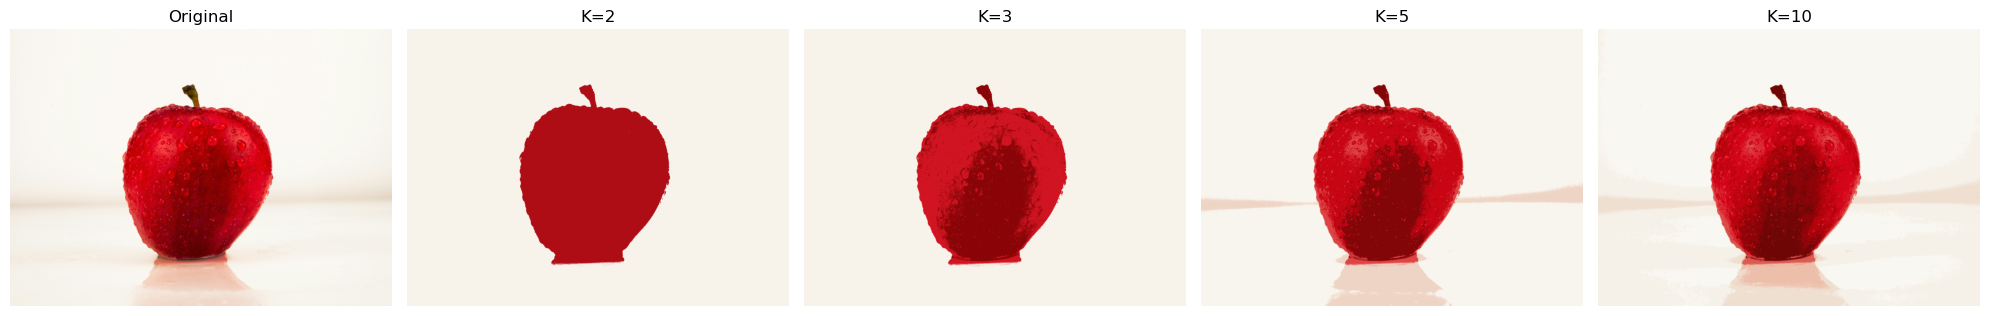

Spremljeno: rezultati\slika1_segmentacija.png


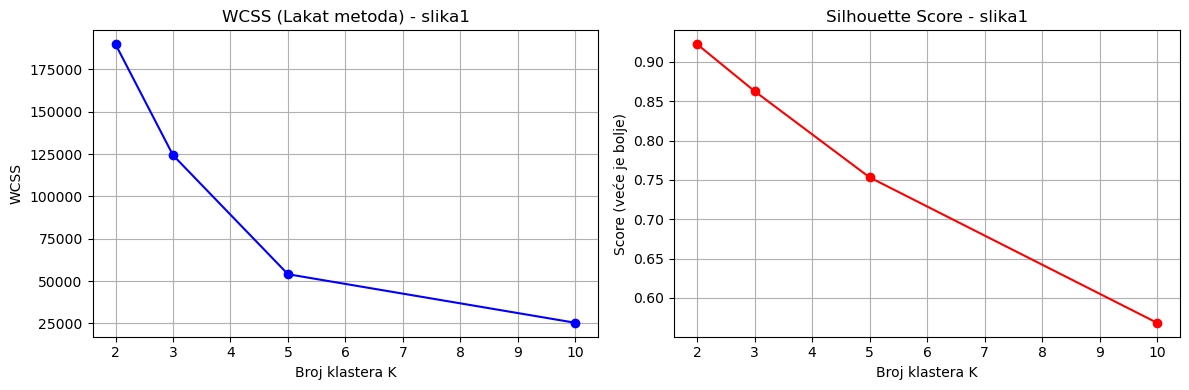

Spremljeno: rezultati\slika1_metrike.png

OBRADA SLIKE: slika2
  -> Računam za K=2...
  -> Računam za K=3...
  -> Računam za K=5...
  -> Računam za K=10...


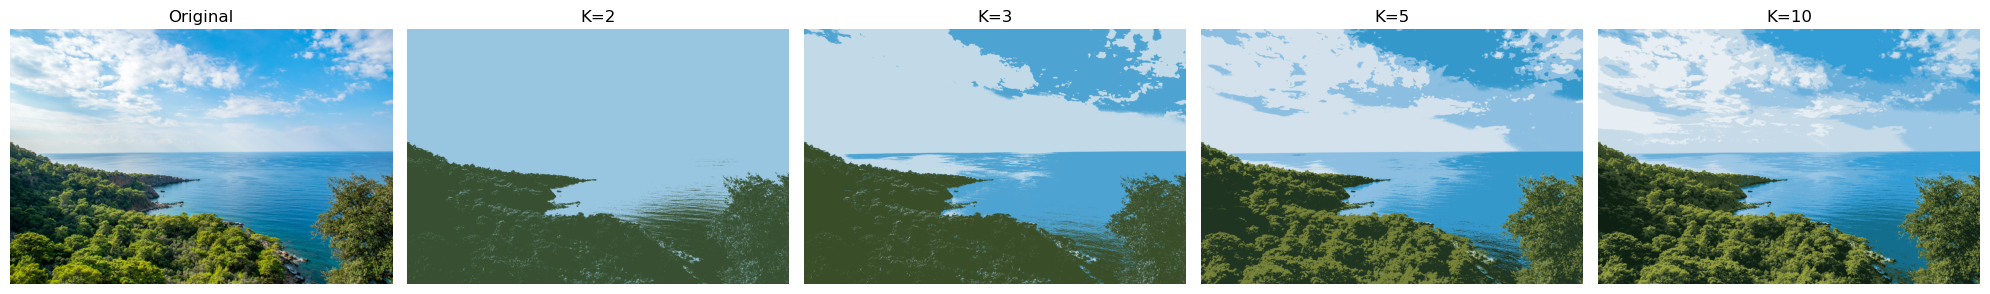

Spremljeno: rezultati\slika2_segmentacija.png


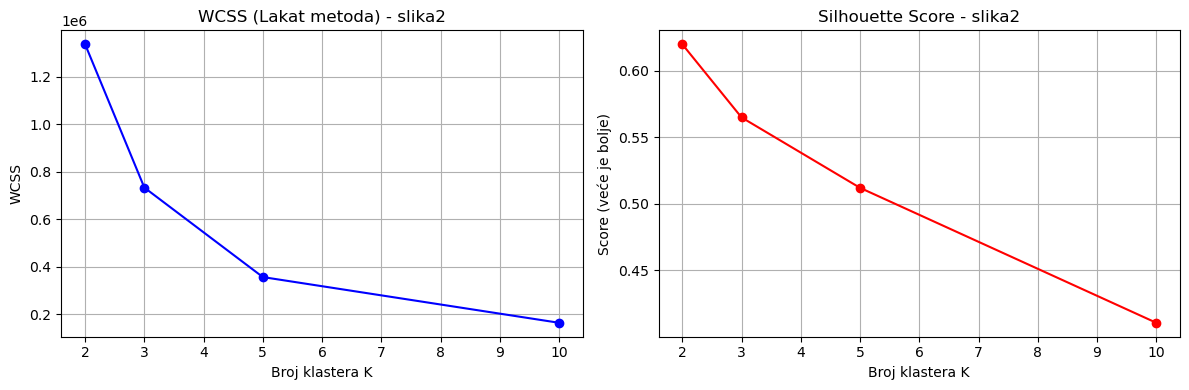

Spremljeno: rezultati\slika2_metrike.png

OBRADA SLIKE: slika3
  -> Računam za K=2...
  -> Računam za K=3...
  -> Računam za K=5...
  -> Računam za K=10...


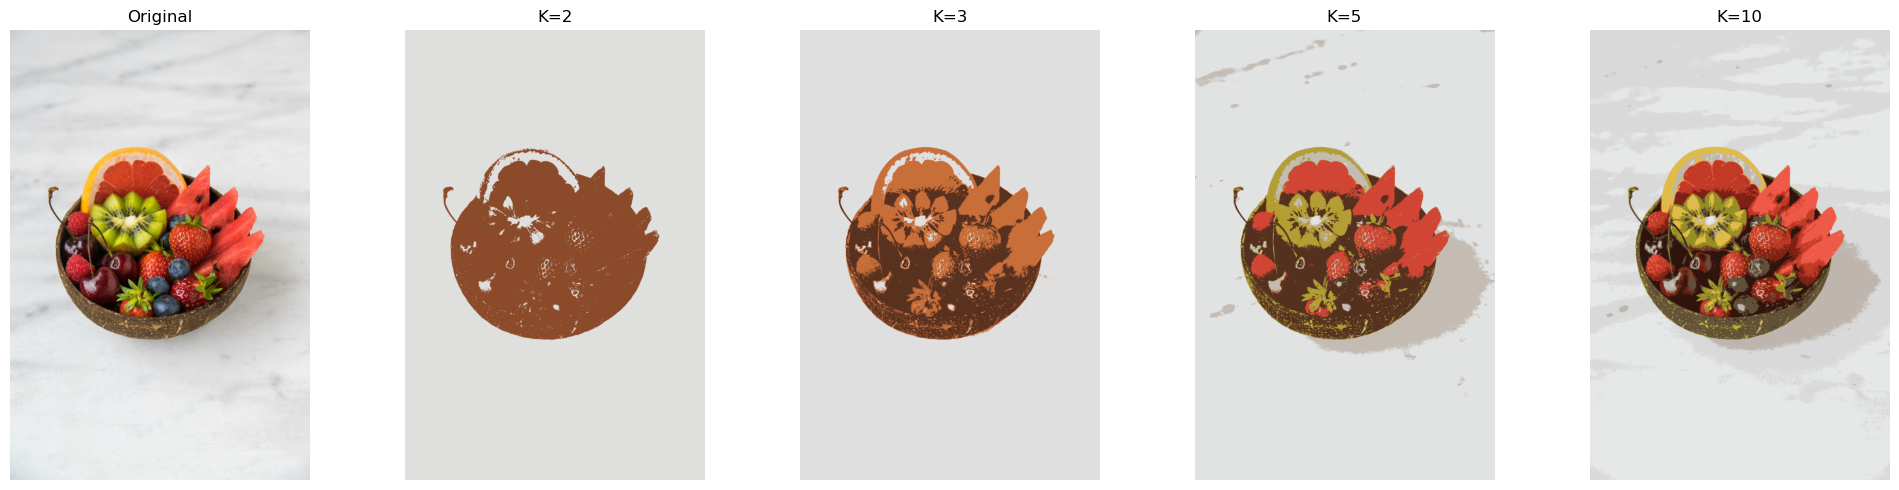

Spremljeno: rezultati\slika3_segmentacija.png


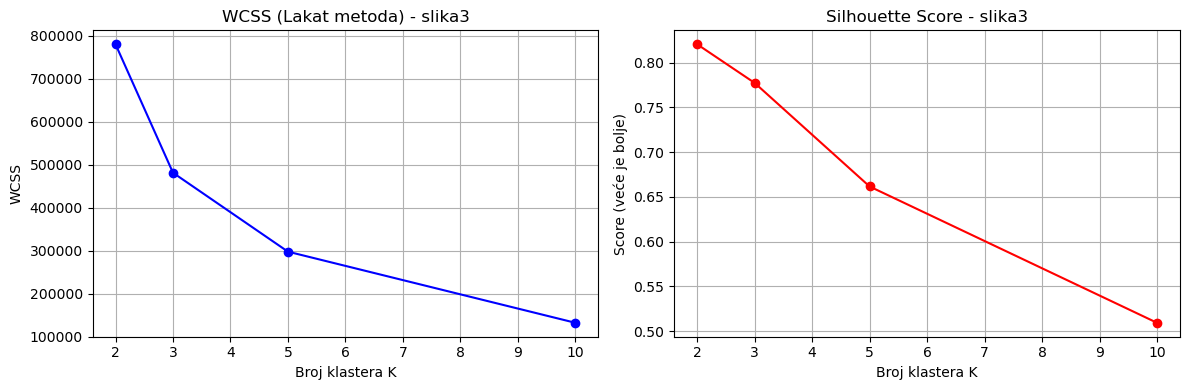

Spremljeno: rezultati\slika3_metrike.png

SVE GOTOVO! Provjerite folder 'rezultati'.


In [5]:
#prolazak kroz svaku pronadenu sliku
for putanja in slike_putanje:
    naziv_fajla = os.path.basename(putanja).split('.')[0]
    print(f"\n{'='*40}")
    print(f"OBRADA SLIKE: {naziv_fajla}")
    print(f"{'='*40}")
    
    #ucitavanje slike
    slika = cv2.imread(putanja)
    if slika is None: continue
    
    #priprema podataka
    slika_rgb = cv2.cvtColor(slika, cv2.COLOR_BGR2RGB)
    slika_norm = np.array(slika_rgb, dtype=np.float64) / 255
    redovi, stupci, kanali = slika_norm.shape
    image_array = np.reshape(slika_norm, (redovi * stupci, kanali))

    wcss_rezultati = []
    silhouette_rezultati = []
    
    # -- DIO 1: SEGMENTACIJA I PRIKAZ --
    fig_seg, axes = plt.subplots(1, len(k_vrijednosti) + 1, figsize=(20, 5))
    
    #prikaz originala
    axes[0].imshow(slika_rgb)
    axes[0].set_title("Original")
    axes[0].axis('off')

    for i, k in enumerate(k_vrijednosti):
        print(f"  -> Računam za K={k}...")
        
        # K-means algoritam
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=3) #n_init=3 je za brzinu
        kmeans.fit(image_array)
        
        #Spremanje metrika
        wcss_rezultati.append(kmeans.inertia_)
        
        # Silhouette score (na manjem uzorku radi brzine)
        uzorak = shuffle(image_array, random_state=42)[:3000]
        labels_uzorak = kmeans.predict(uzorak)
        silhouette_rezultati.append(silhouette_score(uzorak, labels_uzorak))
        
        #rekonstrukcija slike
        centri = kmeans.cluster_centers_
        labels = kmeans.labels_
        seg_slika = centri[labels].reshape(redovi, stupci, kanali)
        
        #prikaz segmentirane slike
        axes[i+1].imshow(seg_slika)
        axes[i+1].set_title(f"K={k}")
        axes[i+1].axis('off')

    #spremanje slike segmentacije
    putanja_seg = os.path.join(output_folder, f"{naziv_fajla}_segmentacija.png")
    plt.tight_layout()
    plt.savefig(putanja_seg)
    plt.show() # Prikaz u notebooku
    print(f"Spremljeno: {putanja_seg}")

    # -- DIO 2: GRAFOVI METRIKA --
    fig_metrike, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    #WCSS Graf
    ax1.plot(k_vrijednosti, wcss_rezultati, 'bo-')
    ax1.set_title(f'WCSS (Lakat metoda) - {naziv_fajla}')
    ax1.set_xlabel('Broj klastera K')
    ax1.set_ylabel('WCSS')
    ax1.grid(True)
    
    #Silhouette Graf
    ax2.plot(k_vrijednosti, silhouette_rezultati, 'ro-')
    ax2.set_title(f'Silhouette Score - {naziv_fajla}')
    ax2.set_xlabel('Broj klastera K')
    ax2.set_ylabel('Score (veće je bolje)')
    ax2.grid(True)
    
    #spremanje grafova
    putanja_metrike = os.path.join(output_folder, f"{naziv_fajla}_metrike.png")
    plt.tight_layout()
    plt.savefig(putanja_metrike)
    plt.show() # Prikaz u notebooku
    print(f"Spremljeno: {putanja_metrike}")
    
print("\nSVE GOTOVO! Provjerite folder 'rezultati'.")

EKSPERIMENT: PRE-SEGMENTACIJA (K=50)

Obrada slike: slika1...
  -> Računam K=50 (strpljenje, ovo traje duže)...
  -> REZULTATI ZA K=50:
     * WCSS: 4902.59
     * Silhouette Score: 0.4156 (Usporedite ovo s grafom!)


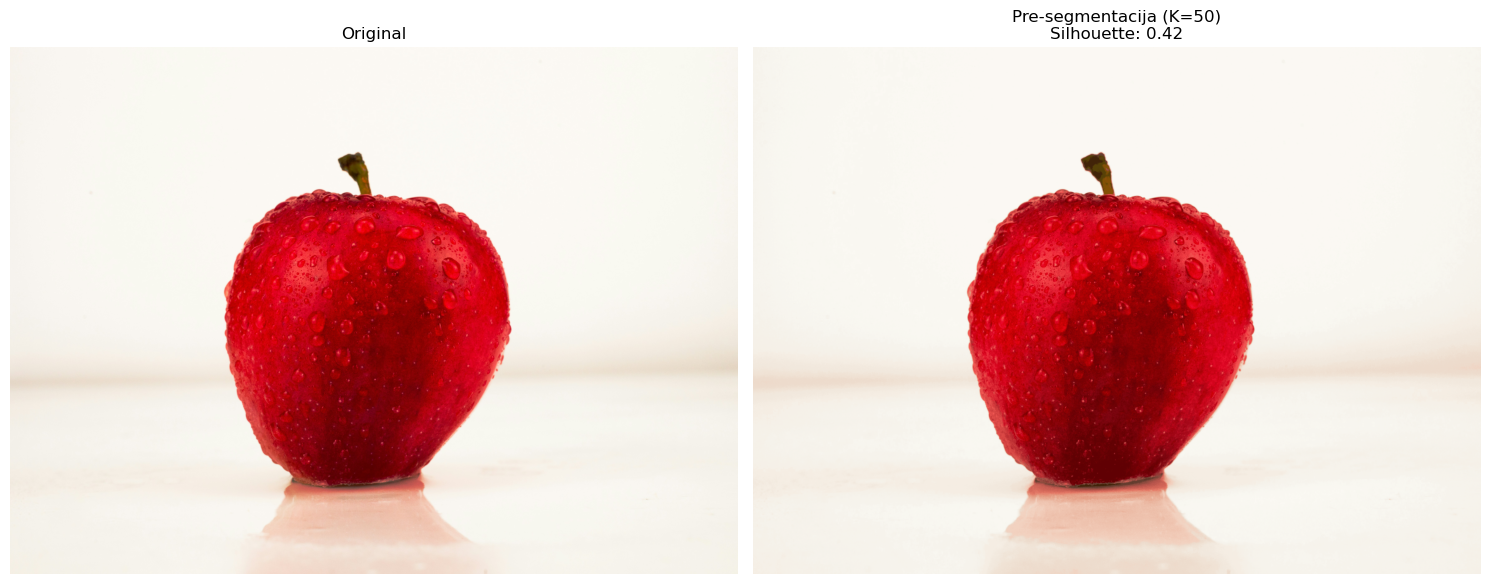

  -> Slika spremljena: rezultati\slika1_K50_usporedba.png

Obrada slike: slika2...
  -> Računam K=50 (strpljenje, ovo traje duže)...
  -> REZULTATI ZA K=50:
     * WCSS: 37894.35
     * Silhouette Score: 0.3179 (Usporedite ovo s grafom!)


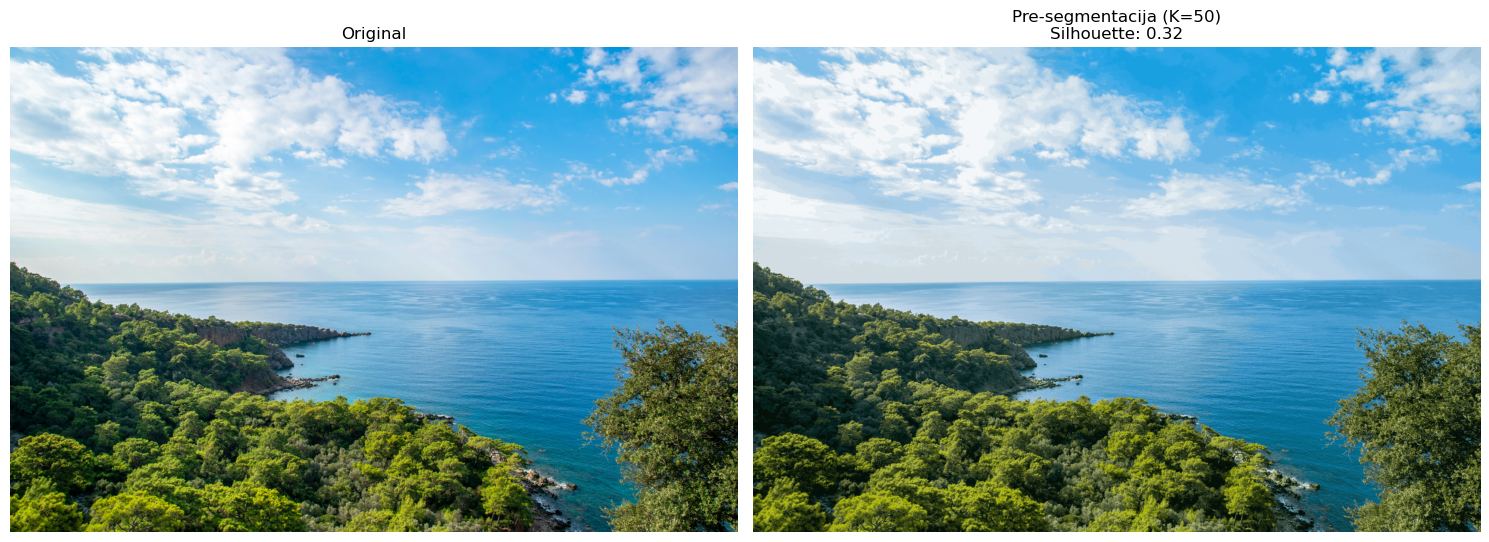

  -> Slika spremljena: rezultati\slika2_K50_usporedba.png

Obrada slike: slika3...
  -> Računam K=50 (strpljenje, ovo traje duže)...
  -> REZULTATI ZA K=50:
     * WCSS: 27361.71
     * Silhouette Score: 0.3974 (Usporedite ovo s grafom!)


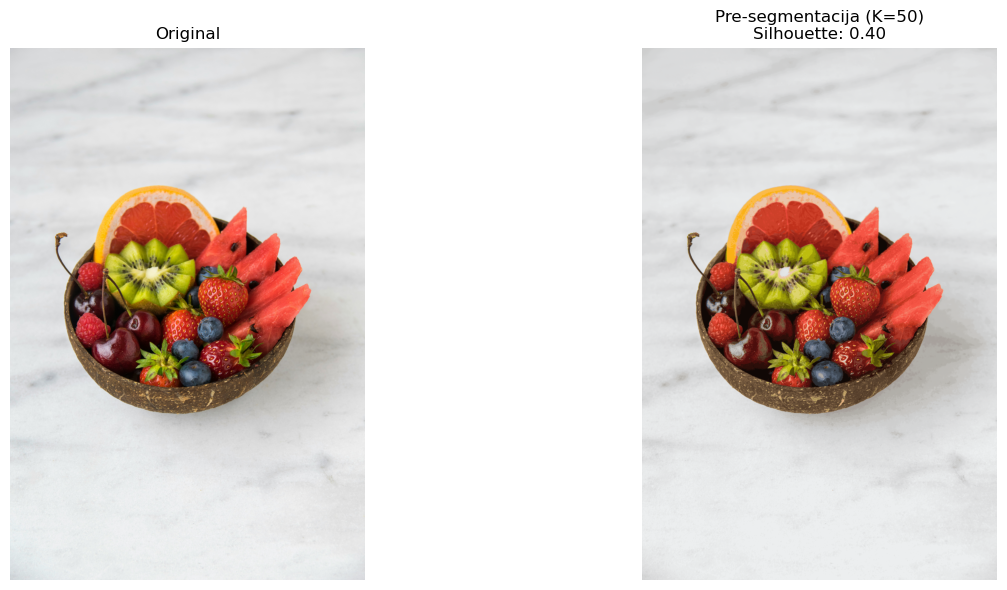

  -> Slika spremljena: rezultati\slika3_K50_usporedba.png

Eksperiment završen!


In [6]:
print(f"{'='*50}")
print("EKSPERIMENT: PRE-SEGMENTACIJA (K=50)")
print(f"{'='*50}")

for putanja in slike_putanje:
    naziv_fajla = os.path.basename(putanja).split('.')[0]
    print(f"\nObrada slike: {naziv_fajla}...")
    
    # Učitavanje
    slika = cv2.imread(putanja)
    if slika is None: continue
    slika_rgb = cv2.cvtColor(slika, cv2.COLOR_BGR2RGB)
    
    # Priprema podataka
    slika_norm = np.array(slika_rgb, dtype=np.float64) / 255
    redovi, stupci, kanali = slika_norm.shape
    image_array = np.reshape(slika_norm, (redovi * stupci, kanali))
    
    # --- K-MEANS K=50 ---
    print("  -> Računam K=50 (strpljenje, ovo traje duže)...")
    kmeans = KMeans(n_clusters=50, random_state=42, n_init=3) 
    kmeans.fit(image_array)
    
    # Metrike za K=50 (samo ispis, bez crtanja grafa)
    wcss = kmeans.inertia_
    
    # Silhouette na manjem uzorku (1000) jer je K=50 spor za računanje
    uzorak = shuffle(image_array, random_state=42)[:1000] 
    labels_uzorak = kmeans.predict(uzorak)
    sil_score = silhouette_score(uzorak, labels_uzorak)
    
    print(f"  -> REZULTATI ZA K=50:")
    print(f"     * WCSS: {wcss:.2f}")
    print(f"     * Silhouette Score: {sil_score:.4f} (Usporedite ovo s grafom!)")

    # Rekonstrukcija
    centri = kmeans.cluster_centers_
    labels = kmeans.labels_
    seg_slika = centri[labels].reshape(redovi, stupci, kanali)
    
    # --- VIZUALIZACIJA (Original vs K=50) ---
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Original
    axes[0].imshow(slika_rgb)
    axes[0].set_title("Original")
    axes[0].axis('off')
    
    # K=50
    axes[1].imshow(seg_slika)
    axes[1].set_title(f"Pre-segmentacija (K=50)\nSilhouette: {sil_score:.2f}")
    axes[1].axis('off')
    
    # Spremanje
    filename = os.path.join(output_folder, f"{naziv_fajla}_K50_usporedba.png")
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    print(f"  -> Slika spremljena: {filename}")

print("\nEksperiment završen!")